In [24]:
#Pour ouvrir des fichiers txt il faut indiquer ou son les espaces
#pour télécharger des fichiers sur internet se placer dans le dossier et faire wget url et penser a le rename
import pandas as pa
import seaborn as sn 
import matplotlib.pyplot as plt
from scipy.stats import linregress
T = pa.read_csv('skincancer.txt',delim_whitespace = True)
T.head()
P = T.query("Ocean == 1")

In [25]:
P

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
3,California,37.5,182,1,119.5
5,Connecticut,41.8,159,1,72.8
6,Delaware,39.0,200,1,75.5
8,Florida,28.0,197,1,82.0
9,Georgia,33.0,214,1,83.5
16,Louisiana,31.2,190,1,91.8
17,Maine,45.2,117,1,69.0
18,Maryland,39.0,162,1,76.5
19,Massachusetts,42.2,143,1,71.8


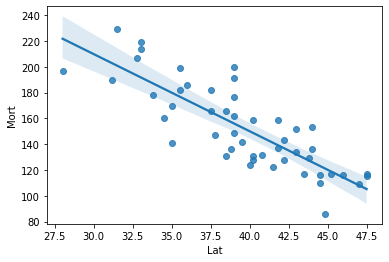

In [14]:
#On va chercher une corrélation entre la latitude et la mort avec le module seaborn de panda par les moindres carrés
sn.regplot(x="Lat",y = "Mort", data = T, ci=98,fit_reg=True)

Selon ce modèle, on voit qu'on a une covariance négative donc selon ce modèle quand la latitude diminue le risque de  mort augmente

In [22]:
#Pour obtenir la regression linéaire direct sans passer par le code d'avant
R = linregress(T['Lat'],T['Mort'])
a,b,r = R[0], R[1], R[2]
sX = T.std(ddof=0)[0]
sY = T.std(ddof=0)[1]
rho = a*sX/sY
a,b,r,rho

(-5.977635744411935,
 389.18935103061955,
 -0.8245177937800732,
 -0.824517793780073)

On se demande si il y a un impact réel de la présence d'un océan sur le risque de mort

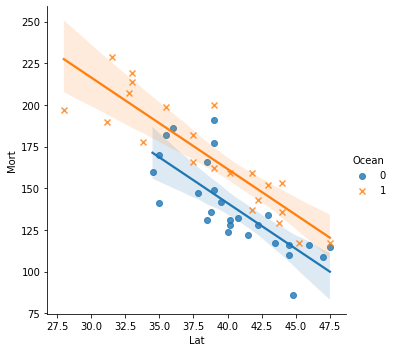

In [23]:
#faire plusieurs nuages de points sur une même figure
sn.lmplot(x="Lat",y = "Mort", data = T, hue = 'Ocean', markers = ["o", "x"],ci=98,fit_reg=True)

In [26]:
#Pour récupérer la régression linéaire il suffit de créer un nouveau tableau avec seulement océan =1 ou 0
R1 = linregress(P['Lat'],P['Mort'])
a1,b1,r1 = R1[0], R1[1], R1[2]
a1,b1,r1

(-5.490820029809004, 381.1995532362523, -0.8866802463409464)

Selon ce modèle apparemment il y a plus de chance de mourir si on est proche d'un océan car il est au dessus de l'autre courbe 